In [2]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import warnings
warnings.filterwarnings('ignore')

### dataset

In [28]:
# dados
df = pd.read_csv('../data/Mall_Customers.csv', sep=',', encoding='iso-8859-1')

In [4]:
# head
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# tail
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
# shape
df.shape

(200, 5)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# types
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
# check NA
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# check duplicates

In [13]:
df.duplicated().any()

False

### tratamento

In [44]:
# novo df
df2 = df.copy()
df2.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


atributos

- CustomerID: identificação do cliente.
- Genre: Gênero.
- Age: idade.
- Annual Income (k$): Rendimento anual.
- Spending Score (1 a 100): Pontuação de gastos.

In [45]:
# CustomerID sem relevancia para modelo
df2.drop('CustomerID', axis=1, inplace=True)

In [46]:
# check drop
df2.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [47]:
# rename
df2.rename(columns={'Genre':'genero',
                   'Age':'idade',
                   'Annual Income (k$)': 'rendimento',
                   'Spending Score (1-100)':'pontuacao'}, inplace=True)

In [48]:
# check rename
df2.head(3)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [49]:
# genero
df2['genero'].value_counts()

genero
Female    112
Male       88
Name: count, dtype: int64

In [50]:
# convertendo para numerica
df2['genero'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [52]:
# check
df2['genero'].value_counts()

genero
1    112
0     88
Name: count, dtype: int64

### analise estatistica

In [53]:
# describe
df2.describe()

,genero,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


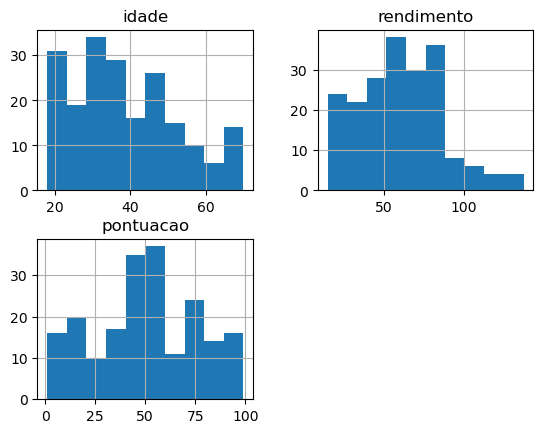

In [55]:
# distribuiçao
df2[['idade', 'rendimento','pontuacao']].hist();

In [70]:
import scipy.stats as stats
# teste shapiro para normalidade
"""
Ho = distribuição normal : p > 0.05
Ha = distribuição != normal : p <= 0.05
"""
for col in ['idade', 'rendimento', 'pontuacao']:
    estatistica, p = stats.shapiro(df2[col])
    print(col)
    print(f'estatisca do teste : {estatistica}')
    print(f'p-valor = {p}')
    if p > 0.05:
        print('distribuição normal\n')
    else:
        print('distribuição não normal\n')

idade
estatisca do teste : 0.9516182290435912
p-valor = 2.710855723091019e-06
distribuição não normal

rendimento
estatisca do teste : 0.9783897545646609
p-valor = 0.0035365109581996213
distribuição não normal

pontuacao
estatisca do teste : 0.9694606767011337
p-valor = 0.00024229713933301153
distribuição não normal



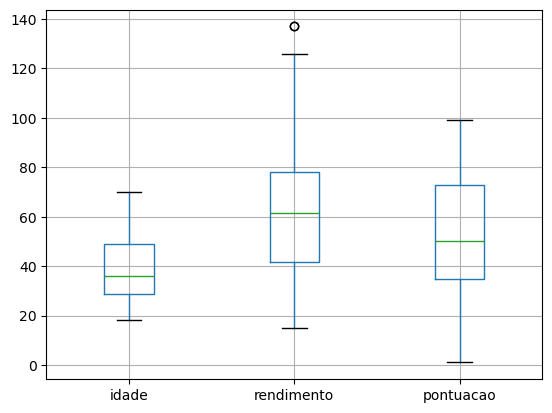

In [56]:
# outliers
df2[['idade', 'rendimento','pontuacao']].boxplot();

In [62]:
# check outliers interquantil
def count_outliers(df, column):
    data = df[column].values
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in ['idade', 'rendimento', 'pontuacao']:
    print("{:<15} {:>6}".format(col, len(count_outliers(df2, col))))

idade                0
rendimento           2
pontuacao            0


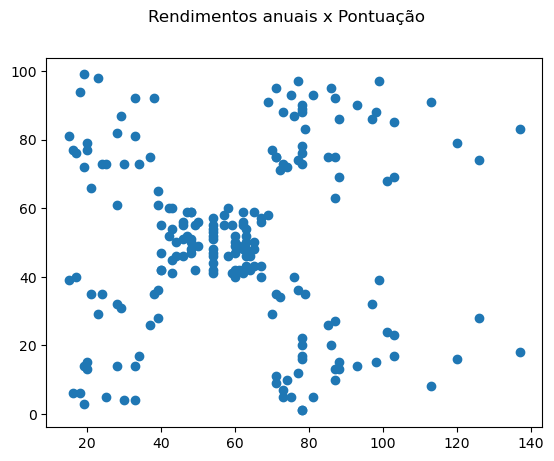

In [64]:
# dispersão
plt.scatter(df2.rendimento, df2.pontuacao)
plt.suptitle('Rendimentos anuais x Pontuação')
plt.show()

In [77]:
# correlações
"""
Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

"""
df2.corr(method='kendall')['pontuacao'].sort_values(ascending=False)

pontuacao     1.000000
genero        0.033115
rendimento   -0.000765
idade        -0.210757
Name: pontuacao, dtype: float64

## salvando dados

In [79]:
df2.to_csv('../data/clean.csv', sep=',', encoding='iso-8859-1', index=False)

In [81]:
# check 
pd.read_csv('../data/clean.csv').head(3)

,genero,idade,rendimento,pontuacao
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
